In [71]:
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words_sp = set(stopwords.words('spanish'))
from nltk.tokenize import word_tokenize

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/Users/renevelasquez/nltk_data'
    - '/Users/renevelasquez/Desktop/python_projects/4recy_DB/venv/nltk_data'
    - '/Users/renevelasquez/Desktop/python_projects/4recy_DB/venv/share/nltk_data'
    - '/Users/renevelasquez/Desktop/python_projects/4recy_DB/venv/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [2]:
df = pd.read_excel('Productos con Data Extra.xlsx')

In [3]:
df.head()

,id_producto,id_marca,nombre_marca,id_empresa,nombre_empresa,id_reciclaje,nombre_reciclaje,id_producto_clasificacion,nombre_productos_clasificacion,nombre,...,estado,created_at,updated_at,subclasificacion,is_new,is_validado,is_completo,promedio,origen,informacion
0,1,1.0,Tottus,NaN,TOTTUS,36.0,OTRO,3.0,DESPENSA,Oregano,...,1,2021-03-03 13:05:38,2021-03-21 20:16:18,NaN,0,1,0,NaN,NaN,NaN
1,2,2.0,Raid,NaN,RAID,31.0,HOJALATA,1.0,ASEO Y LIMPIEZA,"MATA MOSCAS, MOSQUITOS Y ZANCUDOS",...,1,2021-03-20 23:24:29,2021-09-08 00:38:36,METALES,0,1,0,NaN,NaN,NaN
2,3,3.0,Tanax,NaN,TANAX,31.0,HOJALATA,1.0,ASEO Y LIMPIEZA,ANTI BAC Desinfectante,...,1,2021-03-21 20:23:03,2021-03-21 20:23:03,NaN,0,1,0,NaN,NaN,NaN
3,4,4.0,Simond's,NaN,SIMOND'S,36.0,OTRO,1.0,ASEO Y LIMPIEZA,Jabón Glicerina HIGIENIC,...,1,2021-03-21 21:08:46,2021-03-21 21:14:32,NaN,0,1,0,NaN,NaN,NaN
4,5,5.0,Sanyfarm,NaN,SANYFARM,31.0,HOJALATA,1.0,ASEO Y LIMPIEZA,ALCOHOL MICROFILTRADO 70º AEROSOL,...,1,2021-03-21 21:16:44,2021-09-08 00:38:36,METALES,0,1,0,NaN,NaN,NaN


In [4]:
cols = ['nombre_marca', 'nombre_empresa', 'nombre_reciclaje', 'nombre_productos_clasificacion', 'nombre', 'gramos_envase', 'unidad', 'envase', 'descripcion_envase', 'formato', 'tipo', 'subclasificacion']

In [5]:
df2 = df[cols]
for col in cols:
    df2[col]=df2[col].astype('category').cat.codes

/var/folders/nf/gc0__kh133b5ml5907fvy1xh0000gn/T/ipykernel_94869/3121644541.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col]=df2[col].astype('category').cat.codes
/var/folders/nf/gc0__kh133b5ml5907fvy1xh0000gn/T/ipykernel_94869/3121644541.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col]=df2[col].astype('category').cat.codes
/var/folders/nf/gc0__kh133b5ml5907fvy1xh0000gn/T/ipykernel_94869/3121644541.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

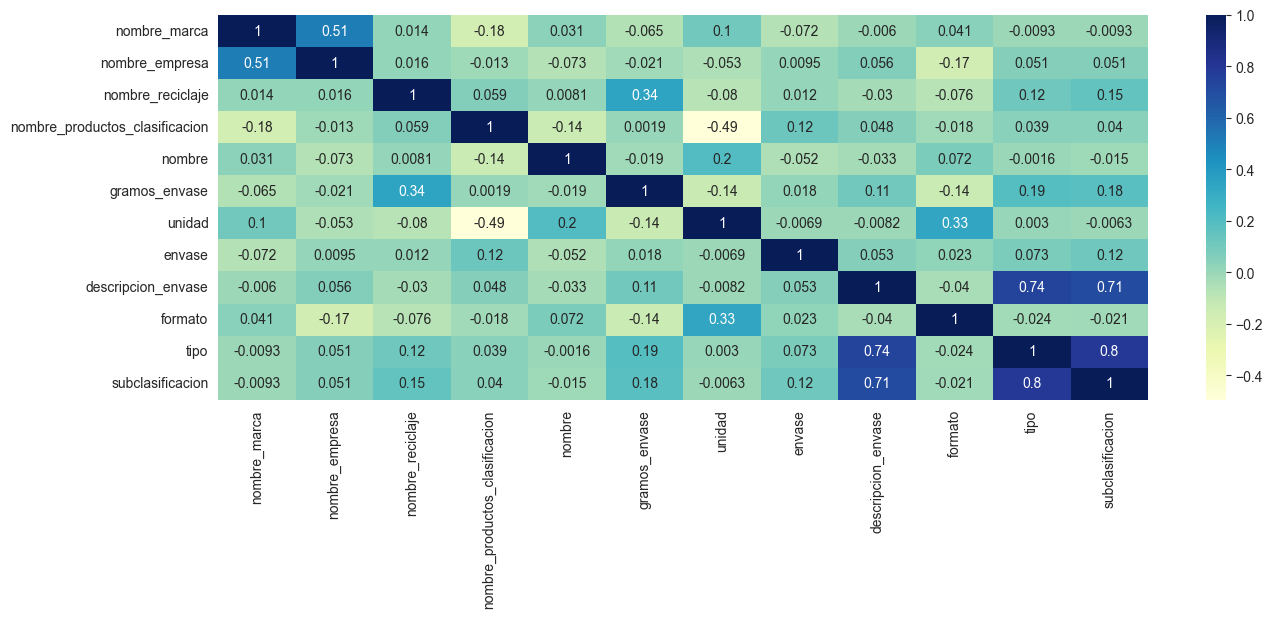

In [6]:
corrMatrix = df2[cols].corr()
plt.figure(figsize=(15,5))
fig_corr = sns.heatmap(corrMatrix,cmap="YlGnBu", annot=True)
plt.show()

In [7]:
df = df[cols]
x = df.isna().sum().to_frame()
x[1] = len(df) - x[0]
x.columns = ['incompletos', 'completos']

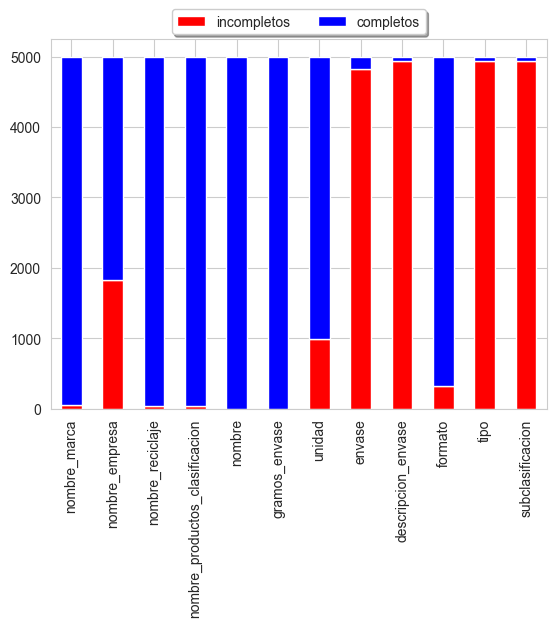

In [8]:
ax = x.plot(kind="bar", stacked=True, color = ['r', 'b'])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
          ncol=3, fancybox=True, shadow=True)

In [62]:
df['nombre_productos_clasificacion'].unique().tolist()

['DESPENSA',
 'ASEO Y LIMPIEZA',
 'LICORES, CERVEZAS Y  VINOS',
 'DESAYUNOS, SNACKS Y  DULCES',
 'BEBIDAS, AGUAS Y JUGOS',
 'OTROS',
 'CUIDADO PERSONAL',
 'PERFUMERIA',
 'FRESCOS Y LÁCTEOS',
 'CARNES, PESCADOS Y  FIAMBRES',
 'CONGELADOS',
 nan,
 'JUGUETERÍA Y ENTRETENIMIENTO',
 'SIN DEPARTAMENTO',
 'SALUD: REMEDIOS Y FÁRMACOS',
 'FRUTAS Y VERDURAS']

In [99]:
df['nombre'] = df['nombre'].str.lower()
df['nombre'] = df['nombre'].astype(str)
prod_list = df['nombre_productos_clasificacion'].unique().tolist()
#df1 = df[df['nombre_productos_clasificacion'] == prod_list[10]]
common_words = list(Counter(" ".join(df["nombre"]).split()).keys())
common_words = [x for x in common_words if len(x)>3]
def has_numbers(inputString):
    return any(char.isdigit() for char in inputString)
common_words = [x for x in common_words if not(has_numbers(x))]
common_words

['oregano',
 'mata',
 'moscas,',
 'mosquitos',
 'zancudos',
 'anti',
 'desinfectante',
 'jabón',
 'glicerina',
 'higienic',
 'alcohol',
 'microfiltrado',
 'aerosol',
 'pisco',
 'campanario',
 'sour',
 'plus',
 'spray',
 'cloro',
 'lavanda',
 'galleta',
 'costa',
 'soda',
 'line',
 'vino',
 'tinto',
 'cabernet',
 'sauvignon',
 'collecion',
 'jugo',
 'natural',
 'manzana',
 'beker',
 'cerveza',
 'mistral',
 'especial',
 'añejado',
 'roble',
 'botella',
 'poeriod',
 'prof',
 'prod',
 'from',
 'celular',
 'hand',
 'cream',
 'humectante',
 'tijeras',
 'tempera',
 'colores',
 'crema',
 'corporal',
 'extra',
 'caja',
 'lápices',
 'bidon',
 'agua',
 'purificada',
 'leche',
 'blanca',
 'descremada',
 'lactosa',
 'goma',
 'para',
 'borrar',
 'cuaderno',
 'torre',
 'boomerang',
 'producto',
 'pielarmina',
 'ketchup',
 'cayena',
 'pasapalabra',
 'soft',
 'milk',
 'papayas',
 'nalcahue',
 'bandeja',
 'carne/',
 'hortalizas',
 'miller',
 'genuine',
 'draft',
 'lata',
 'desodorante',
 'vichy',
 'lide

In [ ]:
alcohol = ['cerveza', 'vino', 'cerv', 'pisco', 'carmenere']
bebida = ['bebida']
despensa = ['aceite', 'helado', 'pasta', 'galleta', 'cereal', 'salsa', 'arroz']
lacteos = ['yoghurt', 'crema', ]

DESPENSA = ['pasta', 'aceite', 'salsa', 'mayonesa', 'tomate', 'arroz', 'harina', 'sal', 'huevo', 'ketchup', 'spaghetti']
ASEO Y LIMPIEZA =
LICORES, CERVEZAS Y  VINOS
DESAYUNOS, SNACKS Y  DULCES
BEBIDAS, AGUAS Y JUGOS
CUIDADO PERSONAL
PERFUMERIA
FRESCOS Y LÁCTEOS
CARNES, PESCADOS Y  FIAMBRES
CONGELADOS
JUGUETERÍA Y ENTRETENIMIENTO
SALUD: REMEDIOS Y FÁRMACOS
FRUTAS Y VERDURAS

In [9]:
#limpieza BBDD
#list = ['Sin asignar']
#for element in list:
#    df = df[df['nombre_marca'] != element]
#list = ['SIN ASIGNAR']
#for element in list:
#    df = df[df['nombre_empresa'] != element]
#list = ['OTRO', 'SIN SUB. CAT']
#for element in list:
#    df = df[df['nombre_reciclaje'] != element]
#list = ['SIN DEPARTAMENTO','OTROS']
#for element in list:
#    df = df[df['nombre_productos_clasificacion'] != element]

In [10]:
df['unidad'].value_counts()

G             1226
ML             384
LT             299
GR             243
UN             213
              ... 
CAPSULAS         1
UNXML            1
HENRY            1
SANTA            1
PACKREGALO       1
Name: unidad, Length: 246, dtype: int64

In [36]:
df['subclasificacion'] = df['subclasificacion'].replace('ALUMINIO', 'METALES')
df['subclasificacion'] = df['subclasificacion'].replace('VIDRIO', 'VIDRIOS')
df['subclasificacion'] = df['subclasificacion'].replace('CARTÓN', 'PAPELES Y CARTONES')
df['subclasificacion'] = df['subclasificacion'].replace('CARTÓN ', 'PAPELES Y CARTONES')
#df = df[df['subclasificacion'].notna()]

0                                 oregano
1       mata moscas, mosquitos y zancudos
2                  anti bac desinfectante
3                jabón glicerina higienic
4       alcohol microfiltrado 70º aerosol
                      ...                
4992                iansa sucralosa 250ml
4993           bon o bon, pp5, 1gr, arcor
4994                        lata kombucha
4995                  vital vidrio 330 ml
4996                       lata budweiser
Name: nombre, Length: 4997, dtype: object

In [42]:
df['nombre'] = df['nombre'].str.lower()
df['nombre'] = df['nombre'].astype(str)
from collections import Counter
Counter(" ".join(df["nombre"]).split()).most_common(100)

[('de', 371),
 ('cerveza', 309),
 ('leche', 304),
 ('vino', 251),
 ('pack', 244),
 ('bebida', 205),
 ('aceite', 198),
 ('sin', 196),
 ('chocolate', 175),
 ('tinto', 144),
 ('en', 140),
 ('helado', 133),
 ('1lt', 128),
 ('polvo', 122),
 ('reserva', 116),
 ('sabor', 115),
 ('light', 110),
 ('gl', 106),
 ('botella', 105),
 ('pasta', 104),
 ('galleta', 100),
 ('oliva', 100),
 ('crema', 97),
 ('cereal', 96),
 ('yoghurt', 96),
 ('con', 95),
 ('cerv', 90),
 ('frutilla', 90),
 ('sauvignon', 83),
 ('blanco', 83),
 ('vainilla', 77),
 ('lata', 76),
 ('salsa', 76),
 ('queso', 72),
 ('te', 72),
 ('lactosa', 70),
 ('cabernet', 69),
 ('espumante', 69),
 ('costa', 68),
 ('natural', 67),
 ('5g', 67),
 ('bolsa', 67),
 ('agua', 65),
 ('gr', 65),
 ('instantanea', 65),
 ('caja', 63),
 ('6un', 63),
 ('loncoleche', 62),
 ('ml', 60),
 ('330cc', 60),
 ('y', 59),
 ('manzana', 59),
 ('manjar', 59),
 ('arroz', 57),
 ('naranja', 56),
 ('pisco', 55),
 ('para', 55),
 ('carmenere', 54),
 ('galletas', 53),
 ('colun', 

In [ ]:
alcohol = ['cerveza', 'vino', 'cerv', 'pisco', 'carmenere', 'cabernet', 'espumante']
bebida = ['bebida']
despensa = ['aceite', 'helado', 'pasta', 'galleta', 'cereal', 'salsa', 'arroz']
lacteos = ['yoghurt', 'crema', 'queso', 'lactosa', 'loncoleche', 'manjar']

In [12]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [13]:
#python -m spacy download es_dep_news_trf
import spacy
nlp = spacy.cli.download("es_dep_news_trf")
nlp = spacy.load("es_dep_news_trf")

You should consider upgrading via the '/Users/renevelasquez/Desktop/python_projects/4recy_DB/venv/bin/python -m pip install --upgrade pip' command.


✔ Download and installation successful
You can now load the package via spacy.load('es_dep_news_trf')


In [14]:
from spacy import displacy
doc = nlp(df['nombre'][7])
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

Cloro cloro NOUN NOUN ROOT Xxxxx True False
Gel Gel PROPN PROPN appos Xxx True False
Lavanda Lavanda PROPN PROPN flat Xxxxx True False


/Users/renevelasquez/Desktop/python_projects/4recy_DB/venv/lib/python3.10/site-packages/torch/amp/autocast_mode.py:198: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


In [15]:
df['nombre'][6]

'ALCOHOL PLUS SPRAY 130 ML'

In [20]:
test= df['nombre'][:10].to_list()
pipeline = ["tok2vec", "tagger", "parser", "ner"]
docs = list(nlp.pipe(test))

/Users/renevelasquez/Desktop/python_projects/4recy_DB/venv/lib/python3.10/site-packages/torch/amp/autocast_mode.py:198: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


In [21]:
docs

[Oregano,
 MATA MOSCAS, MOSQUITOS Y ZANCUDOS,
 ANTI BAC Desinfectante,
 Jabón Glicerina HIGIENIC,
 ALCOHOL MICROFILTRADO 70º AEROSOL,
 Pisco Campanario Sour 20Âº Gl,
 ALCOHOL PLUS SPRAY 130 ML,
 Cloro Gel Lavanda,
 Galleta Costa Soda Line,
 Vino Tinto Cabernet Sauvignon Collecion]

In [29]:
from spacy.matcher import PhraseMatcher


In [31]:
matcher = PhraseMatcher(nlp.vocab)
terms = ["Vino", "Alcohol", "Jabón"]
# Only run nlp.make_doc to speed things up
patterns = [nlp.make_doc(text) for text in terms]
matcher.add("TerminologyList", patterns)

doc = nlp("German Chancellor Angela Merkel and US President Barack Obama "
          "converse in the Oval Office inside the White House in Washington, D.C.")
matches = matcher(doc)
for match_id, start, end in matches:
    span = doc[start:end]
    print(span.text)

/Users/renevelasquez/Desktop/python_projects/4recy_DB/venv/lib/python3.10/site-packages/torch/amp/autocast_mode.py:198: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


In [51]:
doc = nlp("Give it back! He pleaded.")
token = doc[2:7]
token

/Users/renevelasquez/Desktop/python_projects/4recy_DB/venv/lib/python3.10/site-packages/torch/amp/autocast_mode.py:198: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


back! He pleaded.

back